# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<p>The following notebook examines whether the true body mean temperature is in fact 98.6$^{\circ}$F, if it is significantly different, and whether there is a fundamental difference in body temperatures between men and women.</p>

<p>Specifically, it will answer the following questions:
<ol>
<li>  Is the distribution of body temperatures normal? 
<li>  Is the sample size large? Are the observations independent?
<li>  Is the true population mean really 98.6 degrees F?
<li>  Use a small sample of size 10 from the data and repeat both frequentist tests to compare results. 
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
<li>  Is there a significant difference between males and females in normal temperature?
</ol>
</p>
<p>The concepts reviewed include, but are not limit to <em>hyphotesis testing, one-sample hypothesis test, bootstraping, bootstrap replicates, test statistics, confidence intervals, and permutation.</em></p>

#### Resources

Data sources: 
* http://www.amstat.org/publications/jse/datasets/normtemp.txt,
* http://www.amstat.org/publications/jse/jse_data_archive.htm

<hr>

### Set up the enviroment

In [1]:
import warnings
warnings.filterwarnings('ignore')

# pretty print all cell's output and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#sns.set_context("talk")
plt.style.use(['dark_background'])

In [3]:
# import data
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# confirm data was loaded
df.shape
df.head(3)

(130, 3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [5]:
# extract only the temperature data as an array
temperature = df['temperature'].values

## Is the Distribution of Body Temperatures Normal?

<p>There are several ways to explore the distribution of the temperature measures in the dataset and examine if it follows a nearly normal distribution. One of them is to plot the probability distribution of temperature.</p>

</p>The data shows that the body temperatures in this sample are nearly normally distributed, nearly symmetric around the mean, with 95% of the values falling approximately between 96.5 and 99.5 and only a couple of extreme values. A comparison of the PDF plot with a boxplot shows there are two outliers above 3 standard deviations and a single data point below 2 standard deviations from the mean.</p>

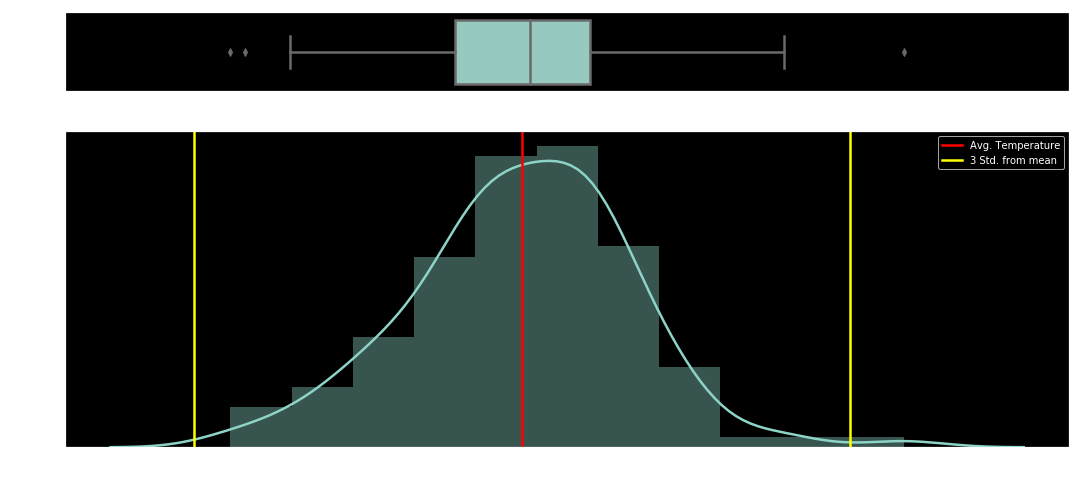

In [6]:
# set the figure size
plt.rcParams["figure.figsize"] = [18,8]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Cut the window in 2 parts to plot boxplot on top of PDF
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.20, .80)})
_=plt.title('Temperature Distribution')
with sns.color_palette(sns.color_palette('muted')):
    _=sns.distplot(temperature, bins = int(np.sqrt(len(temperature))), ax=ax_hist)
    _=plt.axvline(np.mean(temperature), color = 'red')
    _=plt.axvline(np.mean(temperature) + (np.std(temperature)*3), color = 'yellow')
    _=plt.axvline(np.mean(temperature) - (np.std(temperature)*3), color = 'yellow')
    _=plt.legend(['Avg. Temperature', '3 Std. from mean'], fontsize = 10)
    _ = plt.xlabel('body temperature (F)')
    _ = plt.ylabel('density')
#_=plt.subplot(2,1,2)
_=sns.boxplot(temperature, ax=ax_box)

Another way to confirm the data are nearly normal distributed is to compute the empirical cumulative distribution funcion (ECDF) and compare it to a theorical ECDF of a normal distribution. The plot below shows that in fact the observed temperatures follow a nearly normal distribution.

In [7]:
# draw random samples from a normal distribution with mean and std from temperature data
samples = np.random.normal(loc = np.mean(temperature), scale = np.std(temperature), size = 10000)

In [8]:
# define function to compute the ECDF
def ecdf(data_array):
    """Return the empirical cumulative distribution for one dimensional array"""
    # get number of data points
    n = len(data_array)
    # sort the data for the x-axis
    x = np.sort(data_array)
    # set y-axis
    y = np.arange(1, n+1)/n
    
    return x, y

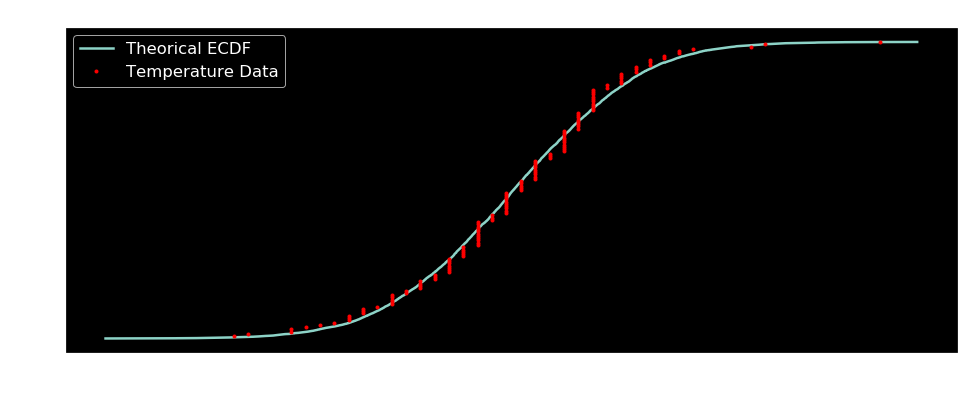

In [9]:
# compute ECDF for temperature and the random samples
sample_x, sample_y = ecdf(samples)
x, y = ecdf(temperature)
plt.rcParams['figure.figsize'] = [16,6]
_=plt.plot(sample_x, sample_y)
_=plt.plot(x,y, marker = '.', linestyle = 'none', color = 'red')
_=plt.title('Checking for Normality')
_=plt.legend(['Theorical ECDF', 'Temperature Data'])
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('ECDF')

<p>Since the temperature distribution shows there are a couple of outliers, with an extreme value 3 standard deviations above from the mean, that may increase the sample variance and the sample mean, thus affecting the computation of the test statistics, this observation was set aside and not used for the first part of the analysis, since we are particularly interested in finding the true population mean using test statistics. </p>

In [10]:
# remove temperatures above 100
temperature = temperature[temperature<=100]

<hr>

## Is the Sample Size Large? Are the Observations Independent?

In [11]:
print('Sample size:',len(temperature))

Sample size: 129


Two of the main conditions of the Central Limit Theorem are:

1. Sample size <em>n</em> >= 30 
2. Independence: The sample is < 10% of the population

Since there are 129 records in the sample set, the sample size condition of n>= 30 is met. We can also assume the independence condition, as 129 records are less than 10% of the total population. 

## Is the True Population Mean really 98.6 Degrees F?

In [12]:
print('Observed sample mean:', np.mean(temperature))
print('***')

Observed sample mean: 98.22945736434107
***


<p>A quick look at the data, shows that the average human body temperature in this sample is 98.23F, which is less than the average reported by Carl Wunderlich of 98.6F. So, what is the probability of observing an average temperature that is >= 98.6, if we take a different sample?</p>
<p>Since we want to know the <b>true average human body temperature </b> and not just the average temperature for this sample, we can resample the data with replacement multiple times, recompute the mean and get a probability distribution of the observed means.</p>
<p>Thus, we can state our hypothesis as follows:</p>
<p>$H_0$: the true average human temperature = 98.6. </p>
<p>$H_A$: the true average human temperature $\neq$ 98.6</p>
<p>$\alpha$ = 0.05</p>
<hr>

## Bootstrap Hypothesis Test

<p>One way to see how likely we are to obtain a sample mean that is at least as extreme as one reported by Wunderlich, is to resample a random sample of the temperature data, recompute the mean, and compare the average temperature we get with the one reported by Wunderlich to see how likely it is to get a mean = 98.6 if we take 10000 samples and compute their mean</p>

In [13]:
# set random seed to replicate results
np.random.seed(44)

# create an array of bootstrap sample with replacement from the observed data
bs_array = np.empty(10000)
for i in range(10000):
    bootstrap_sample = np.random.choice(temperature, size=len(temperature))
    bs = np.mean(bootstrap_sample)
    bs_array[i] = bs

# find the probability of observing a value as extreme or greater than 98.6
p_value = np.sum(bs_array>= 98.6)/len(bs_array)
print('p-value:',p_value)

# 95% confidence interval
print('95% confidence interval:',np.percentile(bs_array, [2.5, 97.5]))
print('___________________________________________________')

p-value: 0.0
95% confidence interval: [98.10542636 98.34883721]
___________________________________________________


<p>The results show that after creating 10000 bootstrap samples and taking the mean for each sample, we can see that the probability of getting an average temperature of 98.6 is 0.0, as demonstrated by the p-value. Since this is an extremely low value, way below our significance level, we can conclude that true mean body temperature is not 98.6F.</p>
<p>In fact, we see that 95% of the average human temperature measures lie within the 95% confidence interval of 98.10 F and 98.34 F.</p>

### ECDF of Bootstrap Estimate of the Mean

The ECDF below shows that out of the 10000 simulations, there were no sample means as extreme as the reported reported by Carl Wunderlich of 98.6.

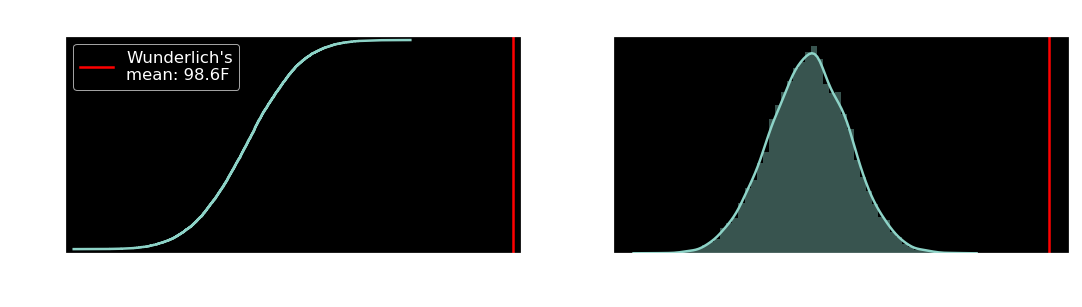

In [14]:
# plot the ECDF of the ECDF results
x,y = ecdf(bs_array)
plt.rcParams['figure.figsize'] = [18,4]
_=plt.suptitle('Distribution Bootstrap Estimate of the Mean')
_=plt.subplot(1,2,1)
_=plt.plot(x,y)
_=plt.margins(0.02)
_=plt.axvline(98.6, color = 'red', label = "Wunderlich's\nmean: 98.6F" )
_=plt.legend()
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('ECDF')

_=plt.subplot(1,2,2)
_=sns.distplot(bs_array, kde=True)
_=plt.axvline(98.6, color = 'red')
_=plt.xlabel('Temperature (F)')

<hr>

## Frequentist Statistical Testing

<p>Since we have one complete dataset and only the average temperature reported by Wunderlich, 98.6F, but not the data he obtained it from, this is a one sample test. Hence, in order to test the null hypothesis that the true mean body temperature is 98.6F, we can recreate his 'experiment' using the sample data we have and shifting the mean to match Wunderlich’ mean, 98.6 $F$ (assumed mean). In this way, we can see if we could get the same values if the true average human body temperature is actually the one Wunderlich reported (the null hypothesis).</p>

### <em>t</em> or 𝑧 statistic?

<p>Although we have a large sample size to use the z-statistic, <em>n>30</em> , we do not have the population standard deviation, so in order to have a better approximation we use the t-statistic, instead of using an estimate of the z-statistic.</p>

<p><em>t-statistic = sample_mean - assumed_population mean ($\mu_0$) / (np.std( /np.sqrt(n))</em></p>

<p>Using the z-score would give us the same score, since we would have to estimate the population standard deviation and use instead the sample standard deviation divided by the square root of n, like so:
    
<p><em>z-statistic = sample_mean - $\mu_0$ / (np.std( /np.sqrt(n))</em></p>

In [15]:
# Simulate the true mean of the sample data 
# is the assumed population average reported by Carl Wunderlich

# Mean of null hyphotesis = value reported by Carl Wunderlich
mu = 98.6

# create a 1D array with the sample temperature values and mean from null hyphotesis
new_mean = temperature - np.mean(temperature) + mu 

# define the test statistic
def t_statistic(data):
    return (np.mean(data) - mu) / (np.std(data)/np.sqrt(len(data)))

# generate summary statistics from the bootstrap sample
def bootstrap_replicates(data, size, function):
    """return a 1d array of bootstrap replicates from random bootstrap sample"""
    # create an empty array of size n
    replicate_array = np.empty(size)
    
    # generate multiple summary statistcs
    for i in range(size):
        replicate_array[i] = function(np.random.choice(data, len(data)))
    
    return replicate_array

#set random seed to replicate results
np.random.seed(44)

t_stat = t_statistic(temperature)

bs_reps = bootstrap_replicates(new_mean, 10000, t_statistic)

# proportion of values less than the observed test statistic, since observed mean is less than the null mean 
p_value = np.sum(bs_reps <= t_stat)/len(bs_reps)
print('p-value: %f'%p_value)

# test statistic
print('t-statistic: %f'%t_stat)

p-value: 0.000000
t-statistic: -6.032389


<p>The results show that the t-statistic, -6.032 is greater the critical t-score (1.96) and the p-value, 0.0, is considerably lower than the 0.05 significance level.<em><b>  Hence, we can reject the null hypothesis and conclude that 98.6 F is not the true population mean.</b></em></p>

<hr>

## Using a Smaller Sample: <em>n = 10</em>

How does a smaller sample change the results?
<p>To examine how a smaller sample can impact the conclusion regarding the null hypothesis, we can first take a random sample of size 10 from the data, resample it 10000 times, recompute the mean, and compare the average temperature we will get with the average temperature reported by Wunderlich.</p>

In [16]:
# set the random seed
np.random.seed(44)

# take a random sample of size 10
sample_10 = np.random.choice(temperature, size=10)

# create an empty array
bs_array_10 = np.empty(10000)
for i in range(10000):
    bootstrap_sample_10 = np.random.choice(sample_10, size = len(sample_10))
    bs_10 = np.mean(bootstrap_sample_10)
    bs_array_10[i] = bs_10

# probability of observing a value as extreme or greater than 98.6
p_value10 = np.sum(bs_array_10>= 98.6)/len(bs_array_10)
print('bootstrapping p-value n=10: %f'%p_value10)

t_stat10 = t_statistic(sample_10)
print('t-statistic = %f'%t_stat10)

bootstrapping p-value n=10: 0.192900
t-statistic = -0.905357


By using a smaller sample, we obtain a much higher p-value, 0.192, higher than the significance level we have chosen of 0.05 and the t-statistic, -0.90, is smaller than the t critical value of a two- tail test with 9 degrees of freedom, 2.26. Hence, in this case we would have to <em>fail to reject the null hypothesis</em> and conclude that the true population mean is not fundamentally different to 98.6F. <em>By using such a small sample we will be making a type II error.</em></p>

<p>Then, we can resample the data using the assumed population mean, by shifting the mean as done with the entire sample, to simulate getting the data under the assumption that the null hypothesis is true.</p>

In [17]:
# create 10000 bootstrap samples and bootstrap replicates using n= 10
mu = 98.6

# get a random sample from data n = 10
np.random.seed(44)

# shift the sample mean
shifted_10 = sample_10 - np.mean(sample_10) + mu

# calculate t-statistic
t_stat10 = t_statistic(sample_10)

# calculate the z-statistic using the population standard deviation
z_stat10 = (np.mean(sample_10)-mu) / (np.std(temperature)/np.sqrt(len(sample_10)))

# shift the mean of the sample data

bs_replicates_10 = bootstrap_replicates(shifted_10, 10000, t_statistic)

# 95% confidence interval
ci_10 = np.percentile(shifted_10, [2.5, 97.5])

# proportion of values less than the observed test statistic, since observed mean is less than the null mean 
p_value_10 = np.sum(bs_replicates_10<=t_stat10)/len(bs_replicates_10)
print('p-value sample size 10: %f'%p_value_10)
print('t-statistic sample size 10: %f'%t_stat10)
print('z-statistic sample size 10: %f'%z_stat10)
print('95% confidence interval n=10: ',ci_10)

p-value sample size 10: 0.227300
t-statistic sample size 10: -0.905357
z-statistic sample size 10: -0.906539
95% confidence interval n=10:  [97.5675 99.8975]


<p>By shifting the mean value and using a smaller sample, we obtain a p-value of 0.227, which is greater than the significance level we have chosen of 0.05 and a t-statistic value smaller than the than the t critical value of a two-tail test with 9 degrees of freedom, 2.26. Hence, as previously stated, we will<em>fail to reject the null hypothesis</em> and conclude that the true population mean is not fundamentally different from 98.6F. <em> A type II error.</em></p>

<em>$t$ or $z$ statistic?</em>
<p>In general, if the sample size is greater than 30 we would use the z-statistic. However, since we need the standard deviation of the underlying population, using the t-statistic gives us a better approximation since we will be using the sample standard deviation anyway. </p>

<hr>

## "Abnormal" Temperatures

<p>At what temperature should we consider someone's temperature to be "abnormal"?
In order to find a temperature that falls outside of the ‘normal range’, we start by computing the margin of error and confidence interval using the formula for one draw, and not N draws.</p>

In [18]:
# using bootstrap sample
np.random.seed(44)
bs_sample = np.random.choice(temperature, size = len(temperature))
mean = np.mean(bs_sample)
sd = np.std(bs_sample)
critical_value = 1.96
n = len(bs_sample)

# margin of error bootstrap sample
margin_error_n = critical_value * (sd / np.sqrt(n))

# margin of error for 1 draw
margin_error_1 = critical_value * (sd / np.sqrt(1))

# 95% confidence interval
ci_upper = mean - margin_error_1
ci_lower = mean + margin_error_1


print('Margin of error one person (1 draw):',np.round((margin_error_1),3))
print('95% condifence interval one person:%d',np.round((ci_upper),3), '-', np.round((ci_lower),3),'\n')
print('Margin of error N draws:',np.round((margin_error_n),3))
# 95% confidence interval bootstrap sample
print('95% of sample data fall between:',\
      np.percentile(bs_sample, [2.5,97.5])[0],\
     'and', np.percentile(bs_sample, [2.5,97.5])[1])

Margin of error one person (1 draw): 1.271
95% condifence interval one person:%d 97.007 - 99.549 

Margin of error N draws: 0.112
95% of sample data fall between: 97.1 and 99.8


<p>Based on the data, the margin of error for the mean body temperature for a single person is 1.271, while the margin of error for the entire sample is 0.112. A person’s 'normal' temperature ranges between 97.01F  and 99.55F. 
Thus, we will consider someone's temperature to be abnormal if it is below 97.007F or above 99.549F.</p>

In [19]:
# shifting the mean
new_mean = temperature - np.mean(temperature) + mu

# random sample of the shifted mean
np.random.seed(44)
shifted_mean = np.random.choice(new_mean, size = len(new_mean))
mean1 = np.mean(shifted_mean)
sd1 = np.std(shifted_mean)
critical_value = 1.96
n1 = len(shifted_mean)

# margin of error for 1 draw
me_1 = critical_value * (sd1 / np.sqrt(1))
print('margin of error 1 draw:',me_1)

# 95% confidence interval
ci_upper = mean1 - me_1
ci_lower = mean1 + me_1
print('95% condifence interval one person:', ci_upper, '-', ci_lower)
print('******')

margin of error 1 draw: 1.2709192364373687
95% condifence interval one person: 97.37791797286496 - 99.9197564457397
******


Simulating that the true mean of the sample data is the assumed population average reported by Wunderlich of 98.6F, we would consider someone's temperature to be "abnormal" below 97.37 or above 99.91F.
<p>However, since we concluded that the true population mean is not 98.6 ${\circ}$F, this range is only base on the null hypothesis.</p>

<hr>

## Normal Temperature in Males and Females

<p>Is there a significant difference between males and females in normal temperature? The following section will examine whether normal temperatures are fundamentally different based on gender. For this section we start by using all the 130 records to see whether the extreme high temperature was being recorded for a male or a female.</p>

<p>$H_0$: male temperature = female temperature </p>
<p>$H_A$: male temperature $\neq$ female temperature</p>
<p>$\alpha$ = 0.05</p>

<p>Using permutation, we can simulate that there is no difference in body temperature between males and females, by reordering the data and ‘ignoring’ the gender labels. </p>

In [20]:
# sample data separately by gender to facilitate analysis
f = df.loc[df['gender']=='F' ,['temperature']]
m = df.loc[df['gender']=='M', ['temperature']]

Summary Statistics Temperature Females:


,temperature
count,65.000000
mean,98.393846
std,0.743488
min,96.400000
25%,98.000000
50%,98.400000
75%,98.800000
max,100.800000



Summary Statistics Temperature Males:


,temperature
count,65.000000
mean,98.104615
std,0.698756
min,96.300000
25%,97.600000
50%,98.100000
75%,98.600000
max,99.500000


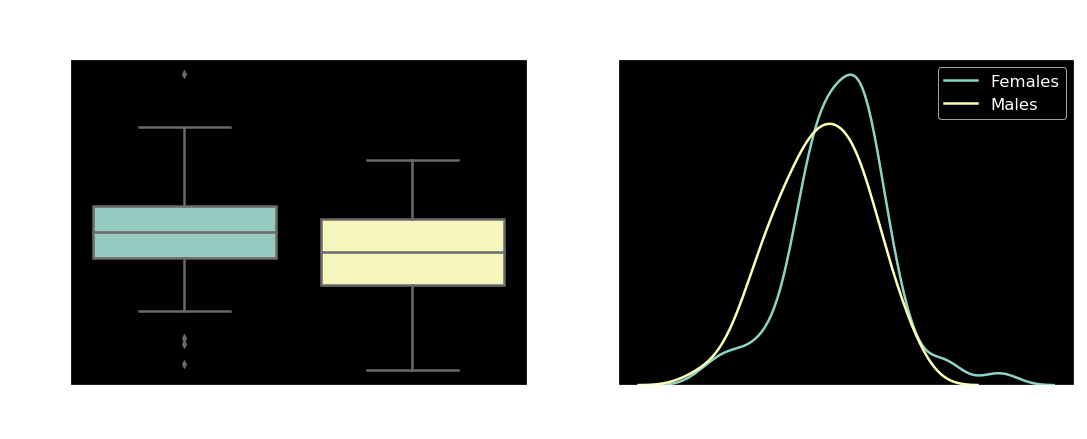

In [21]:
# look at summary statistics
print('Summary Statistics Temperature Females:')
f.describe()
print('\nSummary Statistics Temperature Males:')
m.describe()

# plot the distribution of temperature by gender
plt.rcParams['figure.figsize'] = [18,6]
_=plt.subplot(1,2,1)
_=plt.title('Temperature Distribution by Gender\n', fontsize = 15)
_=sns.boxplot(x = 'gender', y = 'temperature', data = df)

# plot the probability distribution of temperature by gender
_=plt.subplot(1,2,2)
_=plt.title('Temperature Probability Distribution\nby Gender\n',fontsize = 15)
_=sns.distplot(f['temperature'], hist=False, label = 'Females')
               #hist_kws={"histtype": "step", "linewidth": 3})
_=sns.distplot(m['temperature'], hist = False,label='Males')
               #hist_kws={"histtype": "step", "linewidth": 3})

<p>Based on the boxplots and the summary statistics we can see that there are four outliers in the female data set. Since these may significantly increase the average in women’s body temperature, they can also impact computing the difference between male and female average body temperature. Hence, we will first use the median as the test statistic and then the mean to compare if the results are significantly different.</p>

In [22]:
# count outliers
f[f< 97].count()
f[f>100].count()

temperature    3
dtype: int64

temperature    1
dtype: int64

<p>We can look at the ECDF to see the distribution of both datasets</p>

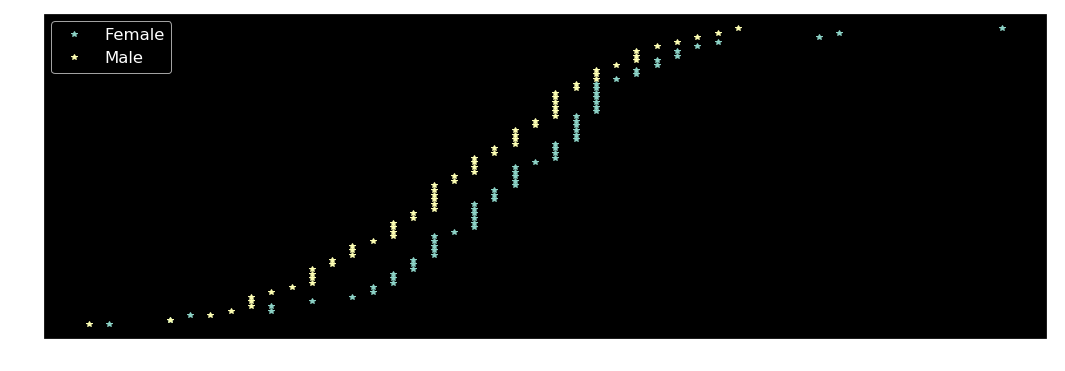

In [23]:
x_f, y_f = ecdf(f['temperature'])
_=plt.plot(x_f, y_f, marker = '*', linestyle = 'none')
x_m, y_m = ecdf(m['temperature'])
_=plt.plot(x_m, y_m, marker = '*', linestyle = 'none')
_=plt.legend(['Female', 'Male'])

The ECDF shows that female temperatures tend to be higher, however to see if the difference is really significant we can simulate an identical distribution using permutation. 

In [24]:
# get the data as arrays for easier analysis
female = f.temperature.values
male = m.temperature.values

np.random.seed(44)

# define permutation function
def permutation_samples(array1, array2):
    """Return a permutation sample from two arrays"""
    # concatenate the two arrays to 'remove' the labels and create the permuation sample
    both_df = np.concatenate((array1, array2))

    # mix the data
    both_perms = np.random.permutation(both_df)

    # randomly separate the data
    perm_1 = both_perms[:len(array1)]
    perm_2 = both_perms[len(array1):]
    
    return perm_1, perm_2

# define a function to compute n size permutation replicates
def permutation_replicates(array1, array2, function, size):
    
    """Return array of sample statistics computer from a permutation sample"""
    
    # create an empty array to store the replicates
    replicates_array = np.empty(10000)
    
    # create the permutation sample of size n
    for i in range(size):
        ps1, ps2 = permutation_samples(array1, array2)
    
        # compute the test statistic
        replicates_array[i] = function(ps1, ps2)
    
    return replicates_array

# create function to obtain the difference of medians
def diff_median(array1, array2):
    """Return the difference in medians of two 1D arrays"""
    diff = np.median(array1) - np.median(array2)
    return diff

# compute the observed difference of medians
observed_diff = diff_median(female, male)
print('observed difference of medians:',np.round((observed_diff),2))

# generate permutation replicates for the median
temp_permutation = permutation_replicates(female, male, diff_median, 10000)

# compute p-value for the medians
p_value_perm = np.sum(temp_permutation>=observed_diff)/len(temp_permutation)
print('p-value = ', p_value_perm)

observed difference of medians: 0.3
p-value =  0.0245


In [25]:
# create a function to obtain the difference of means
def diff_mean(array1, array2):
    """Return the difference in means of two 1D arrays"""
    return np.mean(array1) - np.mean(array2)

# compute the observed difference of means
observed_means = diff_mean(female, male)

# generate permutation replicates for the mean
temp_perm_means = permutation_replicates(female, male, diff_mean, 10000)

# compute p-value of the means
p_value_means = np.sum(temp_perm_means>=observed_means)/len(temp_perm_means)

print('observed difference of means:', observed_means)
print('p-value of means:', p_value_means)

observed difference of means: 0.2892307692307696
p-value of means: 0.0124


* <em>Conclusions</em>
<p>Based on the data and a significance level of 0.05, we conclude that the true mean body temperature is not 98.6 as reported by Wunderlich and in fact, by simulating the sample data 10,000 times, 95% of the average body temperatures lie within the 95% confidence interval, between 98.10 F and 98.34 F. 
Since we consistently obtained a p-value of 0.0, we can say that out of the 10,000 simulations none of the bootstrap replicates of the means were at least as high as 98.6F. Hence, we rejected the null hypothesis. 
When comparing the body temperature between men and women, we found that body temperature is different by gender and that women’s body temperatures tend to be higher. Since we obtained a p-value of 0.0245 using the median and 0.0124 using the mean, we can say that the results are statistically significant at the 0.05 significance level.
</p>